<h1>Tarea 3</h1>
<h2>Fidel Alejandro Navarro Salazar</h2>

Este programa utiliza el método de Monte Carlo para simular un sistema de discos/esferas duras monodispersas con unidades reducidas Sigma-Beta.

<h1>Actividad 1</h1>

Considere una simulacion de Monte Carlo para un sistema bidimensional con un modelo de potencial de disco duro.

Implementar el código presentado en clase (o su análogo) para contruit una configuración inicial aleatoria bidimensional sin traslapes con margen en frontera.

Ejecutar su programa para obtener configuraciones iniciales para los casos siguientes:

a) Concentración reducida fija en $n*=0.4$ y $N=100,500,1000$ partículas.

b) Número de partículas fijo en $N=500$ y $n*=0.2,0.4,0.8$.

In [1]:
import random as rd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from IPython.display import Image
import random as rd
#la función se encuentra en un documento por separado, 
#permite calcular la configuración inicial y la longitud de la caja
#la energía de la configuración inicial para 2D y 3D,
#y el calculo de las configuraciones en 2D y 3D
from config import caja, L_bi, circl, sumup, movimiento, sumup3d, movimiento3d
#%matplotlib qt

En el archivo $config.py$ se encuenran definidas todas las funciones que utilizaremos para las distintas actividades. En este documento solamente le damos valor a las distintas constantes y graficamos los resultados obtenidos por las funciones.

In [7]:
#Establecemos los valores con los cuales trabajaremos

N = 500        #Número de partículas
n = 0.6         #Densidad
dim = 2         #La dimension con la cual trabajaremos (muchas funciones estan generalizadas)
nStep = 12000   #Número de configuraciones
#--------------------------------------------------------------------------------------------
seed = 652      #Semilla a utilizar en el cálculo de valores aleatorios
rd.seed(seed)   #Le damos la semilla al generador de números aleatorios
nFrec = 100     #Frecuencia con la que se guardarán los datos
Nener = 5000    #Iteración donde se alcanza el equilibrio termodinámico
iPrint = 1000   #Cada cuantos pasos escribira en pantalla los resultados
iRatio = 100    #Frecuencia de corección de paso
cc = 0.5        #Criterio de corrección
#--------------------------------------------------------------------------------------------
L = L_bi(n,N,dim)  #LLamamos a la función que nos calcularála longitud de la celda
rCut = L/2.        #Radio de corte
drMax = 0.1        #Longitud de paso
#--------------------------------------------------------------------------------------------
#Por medio de la función "caja" obtenemos las posiciones de la configuración inicial
v = caja(seed,n,N,dim)    #arrays de valores
x = v[:,0].copy()
y = v[:,1].copy()
inicial = pd.DataFrame(v , columns={"x","y"})   #dataFrame de los mismos
#Calculamos la energía de la configuración inicial
V= sumup(N,L,rCut, x, y)
Vlrc = 0. #No hay corrección de largo alcance (potencial de corto alcance)
Vi = V + Vlrc
print ("Energía de la configuración inicial",Vi)

#Seleccionamos una partícula trazadora
iTraza = int(rd.uniform(0,N))
if iTraza==N:
    iTraza = N-1
print ("La partícula trazadora es:", iTraza)

Energía de la configuración inicial 0.0
La partícula trazadora es: 71


In [7]:
xfin, yfin, xTraza, yTraza = movimiento(x, y, N, nStep, L, rCut, drMax, iRatio, iPrint, cc, V, iTraza, Vlrc)

0 0.00772 0.095 0.0 

1000 0.69728 0.154744989543857 0.0 

2000 0.5574 0.2520632819887201 0.0 

3000 0.49472 0.2751311745920729 0.0 

4000 0.4918 0.2717091876725477 0.0 

5000 0.49684 0.26832976224935146 0.0 

6000 0.50862 0.29288630253167725 0.0 

7000 0.50474 0.2892434834376305 0.0 

8000 0.50916 0.28564597247454526 0.0 

9000 0.51284 0.28209320611547234 0.0 

10000 0.48528 0.2785846278424165 0.0 

11000 0.4928 0.27511968805916215 0.0 



Para el sistema con $n*=0.8$ no fue posible encontrar una configuración inicial, el cálculo de posiciones iniciales se detenia entre $300-400$ partículas, por lo tanto, los resultados fueron omitidos.

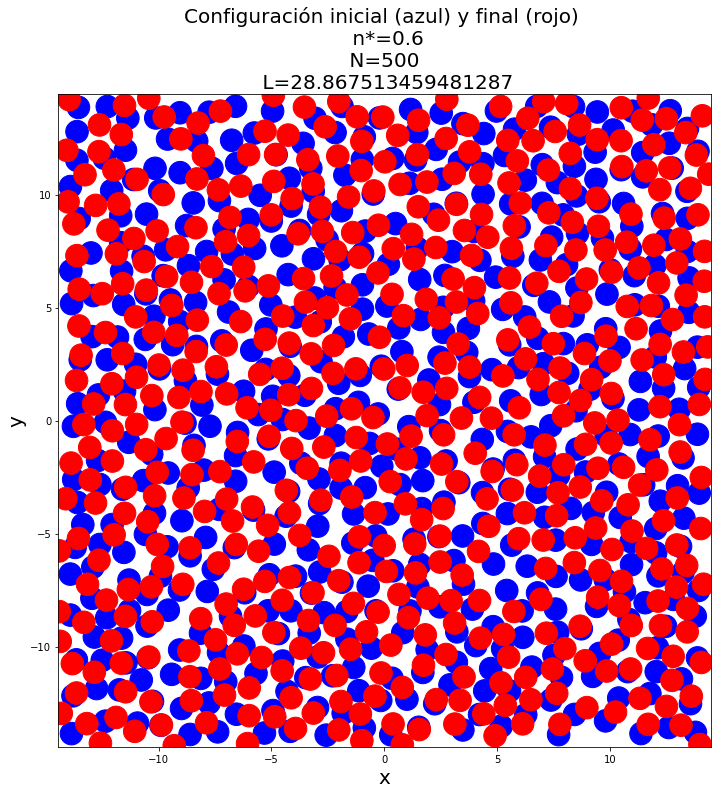

In [8]:
#Graficamos los valores obtenidos
fig, ax = plt.subplots(1,1)
fig.set_size_inches(12,12)
ax.set_aspect( 1 )
for i in range(N):
    ax.add_artist( circl(inicial["x"],inicial["y"],n,N,dim,i,"blue") )   
for i in range(N):
    ax.add_artist( circl(xfin,yfin,n,N,dim,i,"red") )  
    
ax.set_title("Configuración inicial (azul) y final (rojo) \n n*=" + str(n) +"\n N="+str(N)+" \n L="+str(L), size=20)
ax.set_ylabel("y", size=20)
ax.set_xlabel("x", size=20)
ax.set_xlim(-L/2.,L/2.)
ax.set_ylim(-L/2.,L/2.)  

fig.savefig('T3_Act1_n06_N500', dpi=fig.dpi, facecolor="white")
plt.show()

<h1>Actividad 2</h1>
<h3>Empaquetamiento de esferas duras</h3>

Para un sistema de esferas duras del mismo diámetro (monodisperso, de una sola especie), investigar sobre el valor de la máxima fracción en volumen (close paking)

$---------------------------------------------------------------------$

Considerando particulas de igual tamaño e incromprimibles, si juntamos las partículas de tal manera que se encuentren lo más próximas entre ellas minimizando el estapacio vacio obtendremos un arreglo de máxima densidad. A este arreglo lo denominaremos como $close$ $packing$ (máxima fracción en volumen).

En una dimensión podemos ver el close packing como una cadena de partículas ordenadas en una fila, donde cada partícula toca solo a dos vecinas.


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

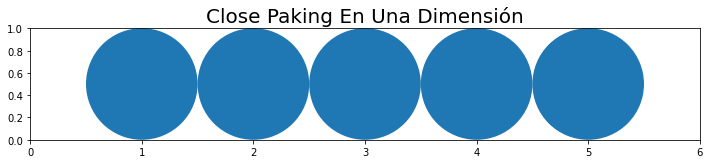

In [9]:
fig, ax = plt.subplots(1,1)
fig.set_size_inches(12,12)
cx = np.array([1,2,3,4,5])
cy = np.array([1/2,1/2,1/2,1/2,1/2])
ax.set_aspect( 1 )
for i in range(5):
    ircle = plt.Circle( (cx[i], cy[i] ), 0.5) #fill=Flase
    ax.add_artist(ircle) #fill=Flase  )
    
ax.set_title("Close Paking En Una Dimensión", size=20)

ax.set_xlim(0,6)
ax.set_ylim(0,1)

plt.plot

Podemos extender este razonamiento a 2 y 3 dimensiones, pero para ello debemos hablar de el empaquetamiento cuadrado y hexagonal.

El empaquetamiento cuadrado es aquel en que una partícula esta colocada de tal manera que toca a 4 vecinas. Para obtener esta configuración basta con colocar filas de particulas similares una sobre otra.

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

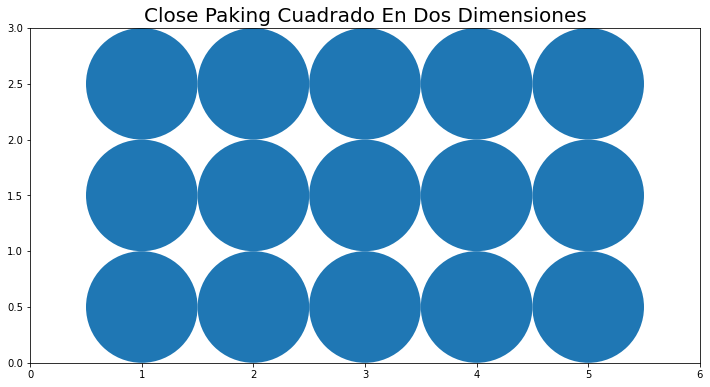

In [10]:
fig, ax = plt.subplots(1,1)
fig.set_size_inches(12,12)
cx = np.array([1,2,3,4,5,1,2,3,4,5,1,2,3,4,5])
cy = np.array([1/2,1/2,1/2,1/2,1/2,3/2,3/2,3/2,3/2,3/2,5/2,5/2,5/2,5/2,5/2])
ax.set_aspect( 1 )
for i in range(15):
    ircle = plt.Circle( (cx[i], cy[i] ), 0.5) #fill=Flase
    ax.add_artist(ircle) #fill=Flase  )
    
ax.set_title("Close Paking Cuadrado En Dos Dimensiones", size=20)

ax.set_xlim(0,6)
ax.set_ylim(0,3)

plt.plot

Por otro lado, el empaquetamiento hexagonal es aquel donde la configuración permite que cada partícula este en contacto con 6 vecinas. Para obtener esta configuración podemos utilizar dos filas distintas donde se alterne entre ellas, donde una de las filas esta desfazada una distancia igual al radio.

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

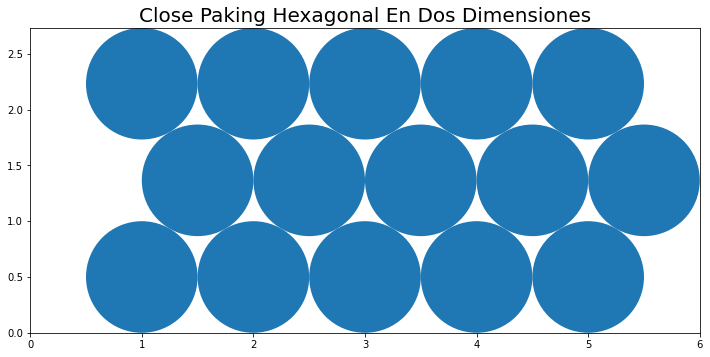

In [11]:
fig, ax = plt.subplots(1,1)
fig.set_size_inches(12,12)
h = np.sqrt(3*0.5**2)
cx = np.array([1,2,3,4,5,1.5,2.5,3.5,4.5,5.5,1,2,3,4,5])
cy = np.array([1/2,1/2,1/2,1/2,1/2,1/2+h,1/2+h,1/2+h,1/2+h,1/2+h,1/2+2*h,1/2+2*h,1/2+2*h,1/2+2*h,1/2+2*h])
ax.set_aspect( 1 )
for i in range(15):
    ircle = plt.Circle( (cx[i], cy[i] ), 0.5) #fill=Flase
    ax.add_artist(ircle) #fill=Flase  )
    
ax.set_title("Close Paking Hexagonal En Dos Dimensiones", size=20)

ax.set_xlim(0,6)
ax.set_ylim(0,1+2*h)

plt.plot

Ambos empaquetamientos ilustrados en dos dimensiones pueden ser implementados en tres dimensiones. Cabe aclarar que para el caso hexagonal las filas estarán desfazadas en más de un plano. Podemos ilustrar esto tomando el ejemplo hexagonal en 2 dimensiones anterior. Si tomamos esta gráfica como la imagen de uno de los planos en la configruación 3D podemos colocar otro plano sobre el mismo pero desfazado una distancia igual al radio.

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

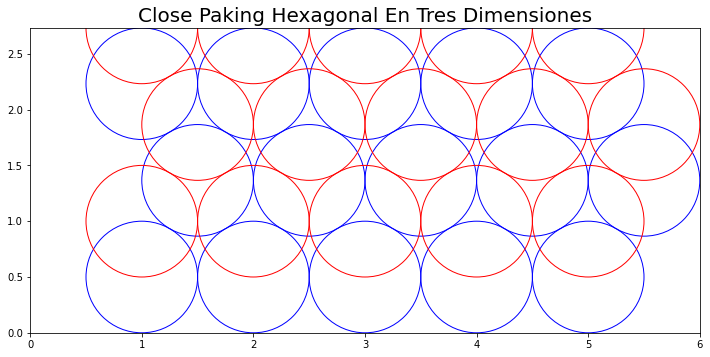

In [12]:
fig, ax = plt.subplots(1,1)
fig.set_size_inches(12,12)
h = np.sqrt(3*0.5**2)
cx = np.array([1,2,3,4,5,1.5,2.5,3.5,4.5,5.5,1,2,3,4,5])
cy = np.array([1/2,1/2,1/2,1/2,1/2,1/2+h,1/2+h,1/2+h,1/2+h,1/2+h,1/2+2*h,1/2+2*h,1/2+2*h,1/2+2*h,1/2+2*h])
ax.set_aspect( 1 )
for i in range(15):
    ircle = plt.Circle( (cx[i], cy[i] ), 0.5, color="blue", fill=False) #fill=Flase
    ax.add_artist(ircle) #fill=Flase  )
#cx = cx +h  
cy = cy + 0.5
for i in range(15):
    ircle = plt.Circle( (cx[i], cy[i] ), 0.5, color="red", fill=False) #fill=Flase
    ax.add_artist(ircle) #fill=Flase  )
    
ax.set_title("Close Paking Hexagonal En Tres Dimensiones", size=20)

ax.set_xlim(0,6)
ax.set_ylim(0,1+2*h)

plt.plot

A nosotros nos interesa trabajar en una configuración en tres dimensiones donde la fracción de volumen máxima es de $\approx 0.74$. Por lo tanto, para una configuración aleatoria de partículas ($random$ $close$ $packing$) esta fracción de volumen debe ser menor a $0.74$. En la bibliografía se reporta que 
la fracción de volumen máxima para un random close packing es de $\approx 0.64$. 

A continuación intentaremos obtener este valor para la fracción de volumen utilizando nuestra función de posiciones aleatorias.

Partiremos de $n*=0.6$, ya que hemos sido capaces de obtener configuraciones con esta concentración.

In [2]:
n = 0.64
N = 1000
dim = 3
seed = 3562
#Se modifico la función caja para visualizar el número de partículas ya asignadas
v = cajaP(seed,n,N) 

print("La concentración máxima encontrada es: ",n)

0
100
200
300
400
500
600
700
800
900
1000
La concentración máxima encontrada es:  0.64


(-5.801986042015973, 5.801986042015973)

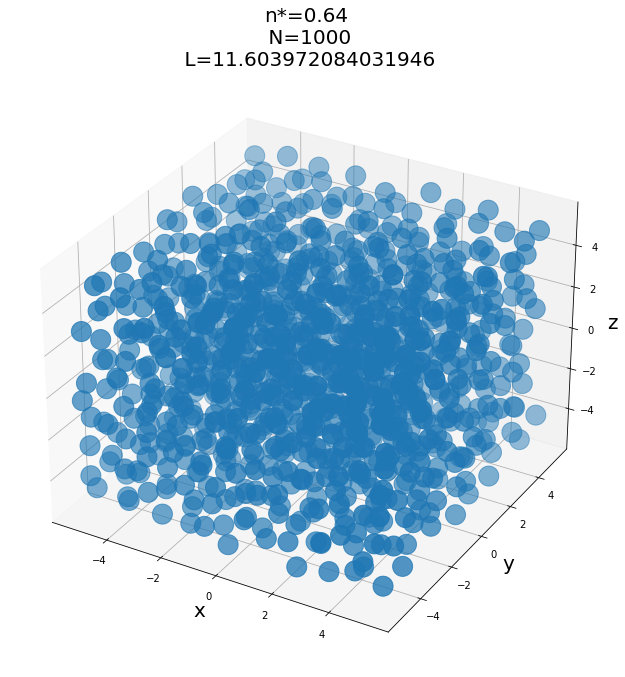

In [25]:
#Graficamos el valor para esta concentración encontrada
fig = plt.figure()
fig.set_size_inches(11,11)
L = L_bi(n,N,dim)

ax = fig.add_subplot(projection="3d")
ax.scatter(v[:,0],v[:,1],v[:,2], "o", s=400)
ax.set_title("n*=" + str(n) + "\n N=" + str(N) + "\n L=" + str(L) , size=20)

ax.set_ylabel("y", size=20)
ax.set_xlabel("x", size=20)
ax.set_zlabel("z", size=20)

ax.set_xlim(-L/2,L/2)
ax.set_ylim(-L/2,L/2)
ax.set_zlim(-L/2,L/2)

<h1>Actividad 3</h1>

Modifique el código MC elaborado para esferas duras, para el caso de un potencial de interacción $u(r)$ de pozo cuadrado (square well), descrito como

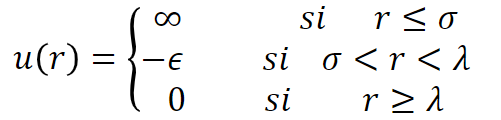

In [8]:
Image(filename = "potencial.png", width = 600, height = 300)

Donde $s$ es el diámetro de las partículas, $l$ y $e$ el alcance y la profundidad del pozo cuadrado respectivamente. Explore tomando como parámetros (adimensionalizados) fijos

$\lambda = 1.25$

$T*=1.0$

así mismo, considere una corrección reducida $n*=0.4$.

In [2]:
#Establecemos los valores con los cuales trabajaremos

N = 500        #Número de partículas
n = 0.4         #Densidad
dim = 3         #La dimension con la cual trabajaremos (muchas funciones estan generalizadas)
nStep = 12000   #Número de configuraciones
#--------------------------------------------------------------------------------------------
seed = 6522     #Semilla a utilizar en el cálculo de valores aleatorios
rd.seed(seed)   #Le damos la semilla al generador de números aleatorios
nFrec = 100     #Frecuencia con la que se guardarán los datos
Nener = 5000    #Iteración donde se alcanza el equilibrio termodinámico
iPrint = 1000   #Cada cuantos pasos escribira en pantalla los resultados
iRatio = 100    #Frecuencia de corección de paso
cc = 0.5        #Criterio de corrección
#--------------------------------------------------------------------------------------------
L = L_bi(n,N,dim)  #LLamamos a la función que nos calcularála longitud de la celda
rCut = L/2.        #Radio de corte
drMax = 0.1        #Longitud de paso
#--------------------------------------------------------------------------------------------
#Por medio de la función "caja" obtenemos las posiciones de la configuración inicial
v = caja(seed,n,N,dim)    #arrays de valores
x = v[:,0].copy()
y = v[:,1].copy()
z = v[:,2].copy()
inicial = pd.DataFrame(v, columns={"x","y","z"})
#Calculamos la energía de la configuración inicial
V= sumup3d(N,L,rCut, x, y, z)
Vlrc = 0. #No hay corrección de largo alcance (potencial de corto alcance)
Vi = V + Vlrc
print ("Energía de la configuración inicial",Vi)

#Seleccionamos una partícula trazadora
iTraza = int(rd.uniform(0,N))
if iTraza==N:
    iTraza = N-1
print ("La partícula trazadora es:", iTraza)

Energía de la configuración inicial -6380000000000.0
La partícula trazadora es: 289


In [3]:
xfin, yfin, zfin, xTraza, yTraza, zTraza, vTraza= movimiento3d(x, y, z, N, nStep, L, rCut, drMax, iRatio, iPrint, cc, V, iTraza, Vi)

0 0.00638 0.095 -27000000000.0 

1000 0.33438 0.05688000922764597 -49140000000.0 

2000 0.4475 0.03405616262881148 -50820000000.0 

3000 0.4978 0.027531434804370397 -51340000000.0 

4000 0.50588 0.027189008287578895 -51780000000.0 

5000 0.50766 0.026850840754027286 -52200000000.0 

6000 0.48928 0.023991462162237655 -52460000000.0 

7000 0.50404 0.026187071408413646 -52640000000.0 

8000 0.48104 0.02339837841913906 -52760000000.0 

9000 0.48676 0.023107357436122106 -52860000000.0 

10000 0.50454 0.022819956071996637 -53040000000.0 

11000 0.48986 0.022536129307187833 -53060000000.0 



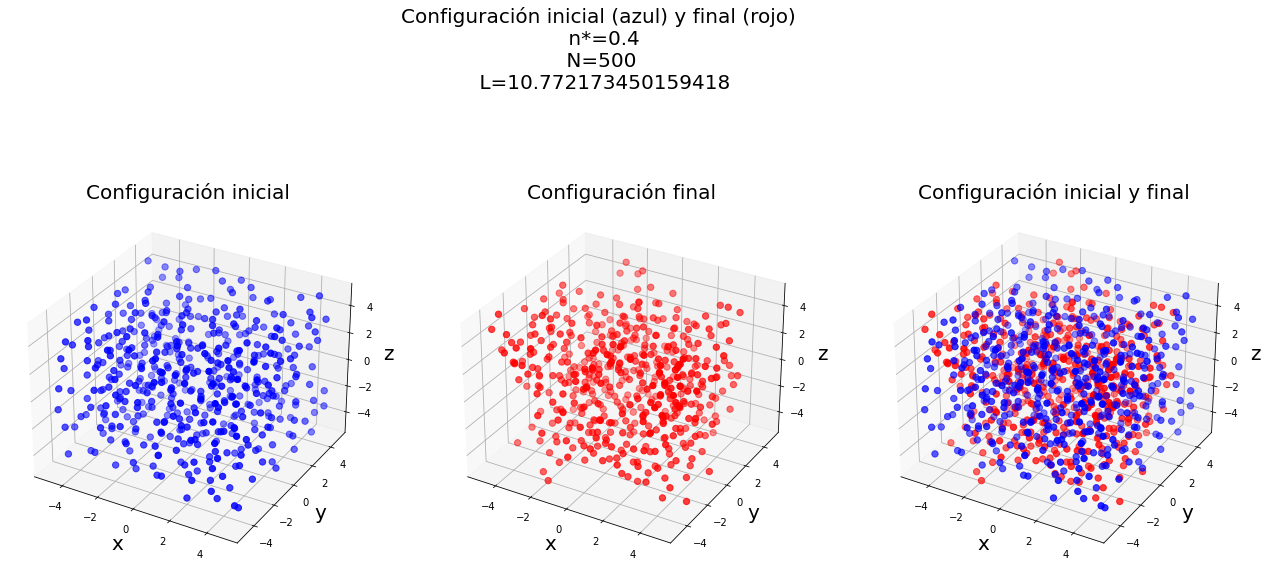

In [4]:
fig = plt.figure()
fig.set_size_inches(22,11)
fig.suptitle("Configuración inicial (azul) y final (rojo) \n n*=" + str(n) +"\n N="+str(N)+" \n L="+str(L), size=20)

ax1 = fig.add_subplot(1,3,1, projection="3d")
ax1.scatter(inicial["x"],inicial["y"],inicial["z"],"o", s=40,c="blue")

ax1.set_title("Configuración inicial", size=20)
ax1.set_ylabel("y", size=20)
ax1.set_xlabel("x", size=20)
ax1.set_zlabel("z", size=20)
ax1.set_xlim(-L/2.,L/2.)
ax1.set_ylim(-L/2.,L/2.)  
ax1.set_zlim(-L/2.,L/2.)

ax2 = fig.add_subplot(1,3,2, projection="3d")
ax2.scatter(xfin,yfin,zfin,"o", c="r", s=40)

ax2.set_title("Configuración final", size=20)
ax2.set_ylabel("y", size=20)
ax2.set_xlabel("x", size=20)
ax2.set_zlabel("z", size=20)
ax2.set_xlim(-L/2.,L/2.)
ax2.set_ylim(-L/2.,L/2.)  
ax2.set_zlim(-L/2.,L/2.)

ax3 = fig.add_subplot(1,3,3, projection="3d")
ax3.scatter(inicial["x"],inicial["y"],inicial["z"],"o", s=40,c="blue")
ax3.scatter(xfin,yfin,zfin,"o", c="r", s=40)

ax3.set_title("Configuración inicial y final", size=20)
ax3.set_ylabel("y", size=20)
ax3.set_xlabel("x", size=20)
ax3.set_zlabel("z", size=20)
ax3.set_xlim(-L/2.,L/2.)
ax3.set_ylim(-L/2.,L/2.)  
ax3.set_zlim(-L/2.,L/2.)

fig.savefig('T3_Act3_n04_N500', dpi=fig.dpi, facecolor="white")

plt.show()

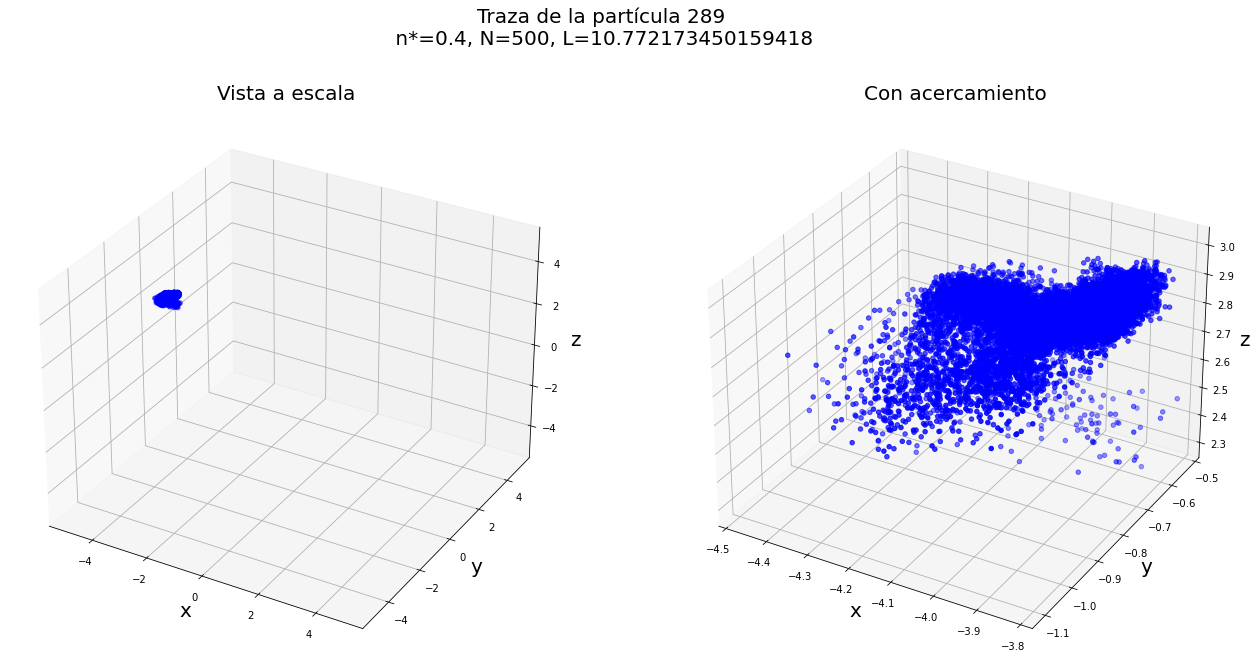

In [5]:
fig = plt.figure()
fig.set_size_inches(22,11)

ax1 = fig.add_subplot(121, projection="3d")
ax1.scatter(xTraza,yTraza,zTraza,".",c="blue")

fig.suptitle("Traza de la partícula " +str(iTraza) + "\n n*=" + str(n) +", N="+str(N)+", L="+str(L), size=20)

ax1.set_title("Vista a escala", size=20)
ax1.set_ylabel("y", size=20)
ax1.set_xlabel("x", size=20)
ax1.set_zlabel("z", size=20)
ax1.set_xlim(-L/2., L/2.)
ax1.set_ylim(-L/2.,L/2.)  
ax1.set_zlim(-L/2.,L/2.)

ax2 = fig.add_subplot(122, projection="3d")
ax2.scatter(xTraza,yTraza,zTraza,".",c="blue")

ax2.set_title("Con acercamiento", size=20)
ax2.set_ylabel("y", size=20)
ax2.set_xlabel("x", size=20)
ax2.set_zlabel("z", size=20)
ax2.set_xlim(xTraza.min(),xTraza.max())
ax2.set_ylim(yTraza.min(), yTraza.max())  
ax2.set_zlim(zTraza.min(), zTraza.max())

fig.savefig('T3_Act3_n04_N500_Traza', dpi=fig.dpi, facecolor="white")

plt.show()

Para visualizar mejor el movimiento de la partícula trazadora realizaremos un acercamiento a la partícula y veremos como se desplaza su centro.

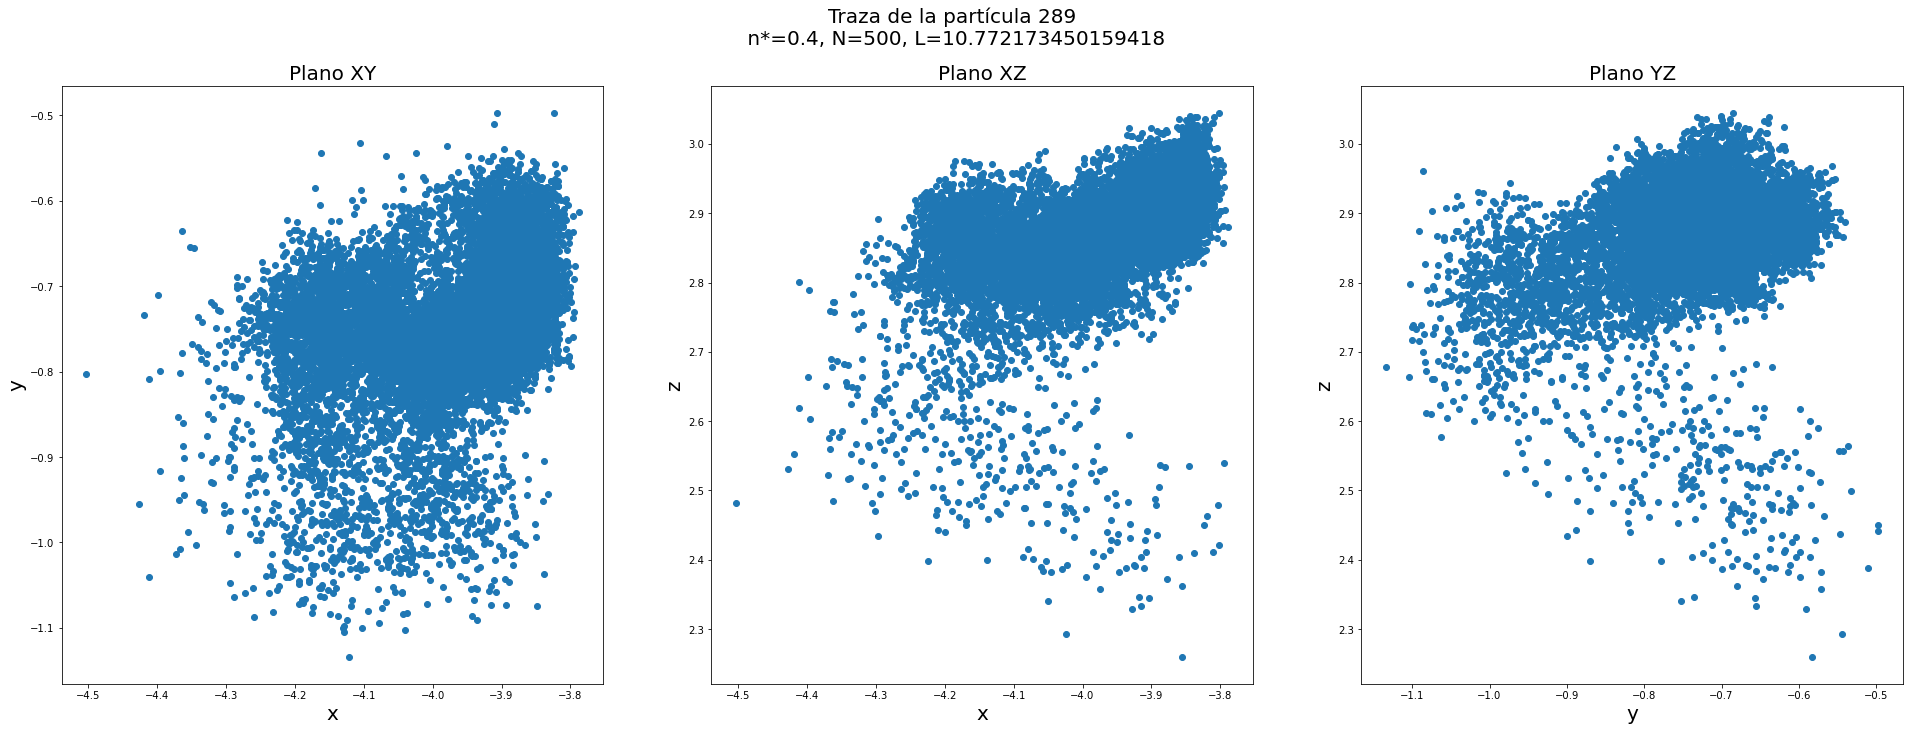

In [6]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)

fig.set_size_inches(33, 11)

fig.suptitle("Traza de la partícula " +str(iTraza) + "\n n*=" + str(n) +", N="+str(N)+", L="+str(L), size=20)

ax1.plot(xTraza, yTraza, "o")
ax1.set_title("Plano XY", size=20)
ax1.set_ylabel("y", size=20)
ax1.set_xlabel("x", size=20)

ax2.plot(xTraza, zTraza, "o")
ax2.set_title("Plano XZ", size=20)
ax2.set_ylabel("z", size=20)
ax2.set_xlabel("x", size=20)

ax3.plot(yTraza, zTraza, "o")
ax3.set_title("Plano YZ", size=20)
ax3.set_ylabel("z", size=20)
ax3.set_xlabel("y", size=20)

fig.savefig('T3_Act3_n04_N500_Traza_Planos', dpi=fig.dpi, facecolor="white")
plt.show()

Graficaremos la variación de la energía potencial para las diferentes coniguraciones.

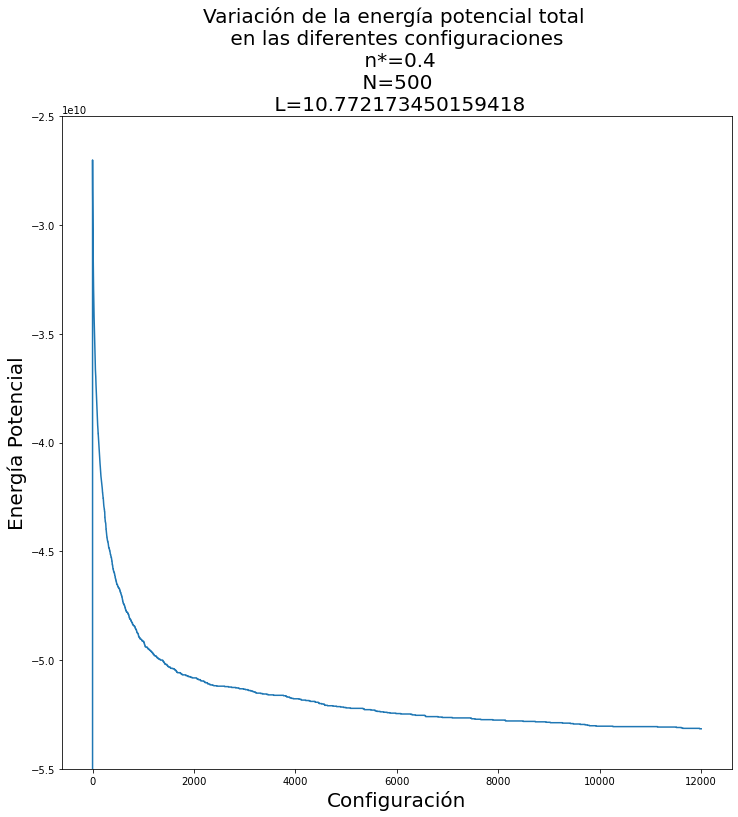

In [7]:
fig, ax = plt.subplots(1,1)
fig.set_size_inches(12,12)

ax.plot(np.linspace(0,nStep+1,nStep+1), vTraza)
    
ax.set_title("Variación de la energía potencial total \n en las diferentes configuraciones \n n*=" + str(n) +"\n N="+str(N)+" \n L="+str(L), size=20)
ax.set_ylabel("Energía Potencial", size=20)
ax.set_xlabel("Configuración", size=20)
ax.set_ylim(-5.5E+10, -2.5E+10) 

fig.savefig('T3_Act3_n04_N500_Confi_Energia', dpi=fig.dpi, facecolor="white")

plt.show()